<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/7_Regresszi%C3%B3_handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresszió


## Definíció

- Változók közti összefüggéseket keres. $y$: függő vagy célváltozó $x_i$: prediktorok
- Egyváltozós esetben
$$ y = f(x_1, x_2, ..., x_p) + \epsilon $$
 - $\epsilon$ a zaj, mindaz a hatás, amit a prediktorok nem tudnak leírni,
 - f pedig a függvény, ami előállítja $y$ közelítését.
- Lineáris regresszió, amikor a változók között lineáris összefüggésekkel dolgozunk.
$$ f(x_1, x_2, ..., x_p) = \beta_0 + \sum_{j=1}^px_j\beta_j $$
 - $\beta$ paraméterek
 - $\beta_0$ konstans, az egyenes metszéspontját jelöli. Szokás szerint "eltüntethető" $x_0=1$ bevezetésévél:
 $$ y= \sum_{j=0}^px_j\beta_j + \epsilon $$
- Jelölés: y becsült értéke
$$ \hat{y} = \beta_0 + \sum_{j=1}^px_j\beta_j $$

## Feltevések

- $\epsilon_i$ iid (independent and identically distributed) sorozat $E(\epsilon_i) = 0$ várható értékkel és konstans $\sigma$ szórással (homoszkedaszticitás, gyakran nem teljesül!)
- Exogenitás $\epsilon_i$, $x_i$ függetlenek $\forall i$-re 
(biztosan teljesül, ha $x_i$-k nem véletlen változók)



## Nevezéktan

- Egyszerű lináris regresszió: 1 skalár értékű magyarázó változó $x$ és skalár értékű $y$ célváltozó

- Többszörös regresszió (multiple linear regression, multivariable linear regression): Több magyarázó változó van: $x_1,x_2, ... , x_p$, amit már vektoros formában is írhatunk: $y=x^T\beta + \epsilon$, ahol $x$ és $\beta$ is vektorok

- Általános lineáris regresszió (multivariate linear regression, general linear regression): Ha $y$ is vektor

- Általánosított lineáris modell: ha speciális feltételek adottak $y$-ra nézve: pl korlátos, katagórikus változó, stb. Ilyenkor egy un link függvény segítségével transzformáljuk a változókat. (https://en.wikipedia.org/wiki/Generalized_linear_model)  Ismert példák:
 - logistic regression (osztályozást old meg!!) - https://en.wikipedia.org/wiki/Logistic_regression
 - Poisson regression (gyakoriság adatokra) - https://en.wikipedia.org/wiki/Poisson_regression
- Hierarchikus lineáris regresszió - https://en.wikipedia.org/wiki/Linear_regression#Hierarchical_linear_models

- Bayes regresszió: együtthatókat valószínűségi változóként kezeli, melyekhez _a priori_ eloszlás modelleket lehet rendelni. - https://en.wikipedia.org/wiki/Bayesian_linear_regression

# Bázis, bázis transzformáció

Alapesetben:
- Kvantitatív értékek (pl: testsúly - magasság)
- Kvalitatív (katerógikus) változók numerikus kódolása

Priori tudás bevitele, transzformációk
- Az eredeti értékek transzformáltja (log, gyök, hatvány, ...)
- Bázis kiegészítés (polinomiális regresszió: $x, x^2, x^3$
- Az eredeti változók közötti egyéb összefüggések. Pl.: $x_1 x_2$

# Eszköztár
- http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

# Hogyan definiáljuk a modellt?
- A fenti modell nem ad megkötést / nem definiálja $\beta_i$ értékét.
- Hiba négyzetösszegének minimalizálása (residual sum of squares, illetve lenti jelöléssel ESS):
$$\underset{\hat y}{\mathrm{argmin}}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
- Ekkor a megoldás (explicit képlet)
$$ \hat{y} = X(X^TX)^{-1}X^Ty $$, ahol
$(X^TX)^{-1}X^T$ az un Moore-Penrose pszeudoinverz

# Illusztráció a magyarázó kapcsolat erősségének jellemzéséhez

Adat: bőrrák okozta mortalitás földrajzi hosszúság függvényében.
Forrás: https://newonlinecourses.science.psu.edu/stat501_su19/lesson/2/2.3

$\hat y$: becsült $y$

$\bar y$: $y$ minta átlaga. Ez is jó viszonyítás alap, ha hipotézis, hogy NINCS kapcsolat a célváltozó és a prediktor(ok) között

![TSS](https://newonlinecourses.science.psu.edu/onlinecourses/sites/stat501/files/03anova/scatterplot_skin_cancer_01.png)

- Total Sum of Squares : $\sum_{i=1}^{n}(y_i-\bar{y})^2 =53637$
- Regression Sum of Squares  : $\sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2 =36464$
- Error Sum of Squares, Residual Sum of Squares: $\sum_{i=1}^{n}(y_i-\hat{y}_i)^2 =17173$

A regressziós négyzetes hibaösszeg tehát megmutatja, mennyire "erős" a regresszió, a célváltozó varianciája mennyire függ a prediktorétól. A maradék tag pedig a zaj hatását méri.

Jelölések sokszor zavarosak, RSS tehát kétféle dolgot is jelölhet, de leggyakrabban a hibatagra használják, mi is így teszünk (tehát RSS: Residual Sum of Squares)

RSS kapcsolata a gyakran használt átlagos négyzetes hibával (Mean Squared Error, MSE)
* https://en.wikipedia.org/wiki/Mean_squared_error
* $MSE =\frac{1}{N-K}RSS$, ahol N a mintaszám, K a modell paraméterek száma.

In [ ]:
# Importálunk
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Defaultozunk
rcParams['figure.figsize'] = 12, 10

In [ ]:
# Diabetes adatszet betöltése sklearn saját adataiból
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Coefficients: 
 [949.43526038]
MSE: 3890.46


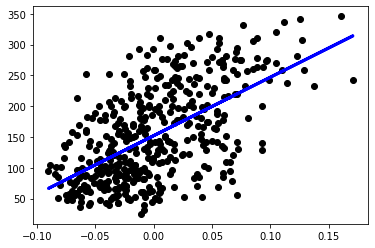

In [ ]:
# Csak egy feature-t (body mass index) használunk!
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Lin reg model objektum létrehozása
regr = linear_model.LinearRegression()

# scikit learn módszertan: fit: tanítás, predict: becslés
regr.fit(X, y)
y_pred = regr.predict(X)

# Együtthatók
print('Coefficients: \n', regr.coef_)
# MSE
print("MSE: %.2f"
      % mean_squared_error(y, y_pred))

# Ábra készítés
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.show()

# Modellek összehasonlítása (pontosság versus bonyolultság)

- Akaike information criterion(AIC):
 - $2K-2ln(L)$, ahol 
 - K a besült paraméterek száma az adott modellben,
 - L az un likelihood függvény ($L=p(y|M,\beta^*)$ annak valószínűsége, hogy adott paraméter érték mellett a választott modell leírja a megfigyeléseket,
 - $\beta^*$ az a paraméter érték, ami maximalizálja $L$-t.


- Bayesian information criterion (BIC):
 - $ln(N)K-2ln(L)$, ahol
 - N a mintaszám, a többi változót lásd fent.
 - Normális zajt feltéve egyszerűbb kifejezést kapunk: $BIC = Nln(\frac{RSS}{N})+Kln(N)$

- Mallows's Cp.
 - AIC-vel rokon, de kifejezetten regressziós problémáknál szeretik, ha legkisebb négyzetes hiba illesztést alkalmaznak.
 - Cél: mérni, hogy K lehetséges prediktorból P darabot választva mennyire jó az illesztés.
 - Tipikus alkalmazás az un szakaszos (inkrementális) regresszióban megállási feltétel (stepwise regression)
 - P prediktort választva: $C_P=\frac{RSS_P}{RSS_K}-N+2P$

- Likelihood-ratio teszt
 - Két statisztikai modell összehasonlítása abból a szempontból, hogy mennyire illeszkednek az adatokra.
 - Részletek: https://en.wikipedia.org/wiki/Likelihood-ratio_test

- Bayes factor
 - Bayes model comparison, nem maximum likelihood módszer, minden lehetséges paraméter értéket figyelembe vesz két modell összehasonlítása során.
 - Részletek: https://en.wikipedia.org/wiki/Bayes_factor

# Robusztus regresszió


## Probléma felvetés

- A négyzetes hiba könnyen el tudja húzni az illesztést
- y-outlier

![y_outlier](https://drive.google.com/uc?export=view&id=1-aJOPuJRqh6U8tKS8TTx69L1lDhjc64h)


- illetve x-outlier esetben

![x_outlier](https://drive.google.com/uc?export=view&id=1R5wIf3i_4PnKJCt4Su_ZgnJ24PSI8O0i)


## Módszerek

### LAD (Least absolute deviations, L1-norma minimalizálása)
 - $$\sum_{i=1}^n|y_i-\hat{y}_1|$$
 - Kisebb súlyt ad outlier-eknek, robosztus statisztikára épül.
 - Gond lehet, hogy nem feltétlenül egy megoldást ad.


### LTS (Least trimmed squares)
 - Adatpontok részhalmazára illeszt, majd az illesztett modelt teszteli az összes adatponton.
 - Részhalmaz választás sima négyzetes hiba illesztés alapján kapott egyedi reziduálisok sorbarendezése alapján történik (H<N adatpont, melyek a legkisebb reziduálissal rendelkeznek).
 - Naiv implementáció nagyon számolásigényes sok adatra és nagy részhalmazra.
 - Viszont robosztus, hatékonyan szűri ki az outlier-eket.
 - Vannak hatékony módosításai is, lásd: https://pdfs.semanticscholar.org/d2fd/55fc44935e2342250b8c21f13f3aeddeab0d.pdf
 - Közelítéseit alkalmazzák képelemzésben: http://cfm.uestc.edu.cn/~fshen/TIP2013.pdf


### Huber-loss
 -  \begin{equation}
  L(y,\hat y)=\begin{cases}
    \frac{1}{2} (y-\hat y)^2, & \text{ha }  |y-\hat y |<\delta\\
    \delta(|(y-\hat y)|-\frac{1}{2}\delta), & \text{egyébként}.
  \end{cases}
\end{equation}
 - Veszteségfüggvény minimalizálása (négyzetes hiba és az L1-norma hiba kombinálása).
 - Egy módosítása fontos lesz majd az osztályozási feladatoknál ("hinge-loss")

![Huber_loss](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Huber_loss.svg/1280px-Huber_loss.svg.png)
- Kék: négyzetes hibafv,
- Zöld:Huber-loss. 0 körül úgy viselkedik, mint a négyzetes fv, távolabb, mint az L1


### RANSAC regresszió
- Robusztus módszer
- Algoritmus
 - Válasszunk véletlenszerűen annyi minta elemet, ami minimálisan elegendő a modell tanításához.
 - Nevezzük el ezeket az elemeket inliereknek.
 - Illesszük a modellt az inlierekre.
 - Nézzük meg, hogy a többi pont mennyire illeszkedik. Amelyik illeszkedik, az a konszenzus halmazba kerül.
 - A modell jó, ha elég nagy a konszenzus halmaz.
 - A modell javítható a konszenzus halmazban található elemekkel.
- A fenti algoritmust többször futtatjuk.
- Megállunk, ha találunk egy megfelelőt (elég nagy a konszenzus halmaz)

Estimated coefficients (true, linear regression, RANSAC):
Adatok: 82.1903908407869
Linreg: 54.172363869015264
RANSAC: 82.08533158726632


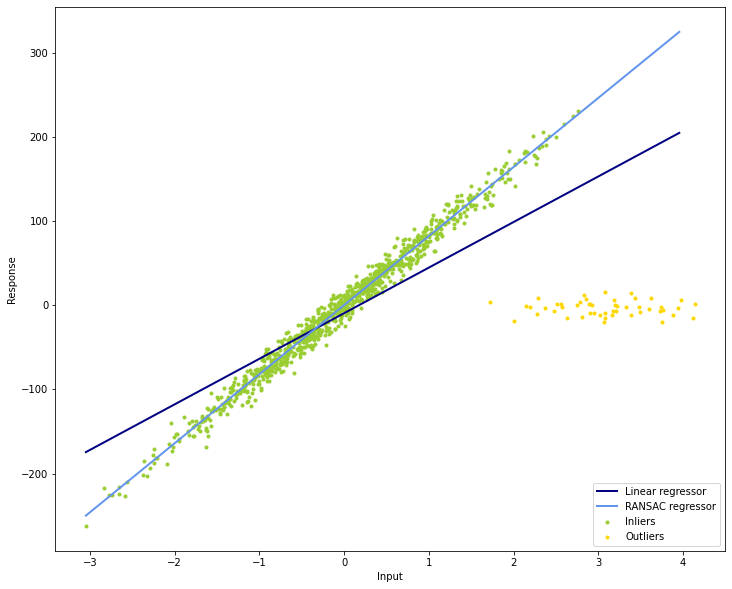

In [ ]:
# Mintapontok száma
n_samples = 1000
# Outlierek száma
n_outliers = 50

# Minta létrehozása
# Lásd: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
# "The output is generated by applying a (potentially biased) random linear regression model with n_informative nonzero regressors to the previously generated input and some gaussian centered noise with some adjustable scale."
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
# Outlierek generálása, hozzáadása
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Lineáris regresszió
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Ransac regresszió
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

# Inlierek és outlierek elkérése a modelltől
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Koordináták elkészítése a modellek megjelenítéséhez
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# A koefficiensek kiíratása
print("Estimated coefficients (true, linear regression, RANSAC):")
print("Adatok: " + str(coef))
print("Linreg:", lr.coef_[0])
print("RANSAC: " + str(ransac.estimator_.coef_[0]))

# Plot
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

## Példa

### Minta adat

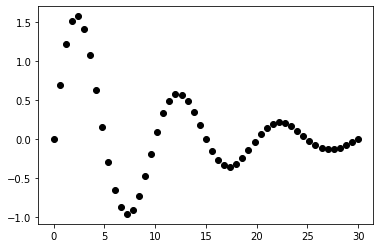

In [10]:
# Importálunk
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error



t_min = 0
t_max = 30

def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] = 10

    return y + error

X = np.linspace(t_min, t_max, 51)
y = generate_data(X, A=2, sigma=0.1, omega=0.1 * 2 * np.pi, noise=0, n_outliers=0)

plt.scatter(X, y,  color='black')
plt.show()

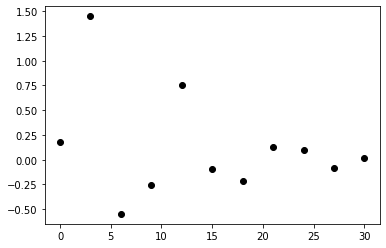

In [11]:
X = np.linspace(t_min, t_max, 11)
y = generate_data(X, A=2, sigma=0.1, omega=0.1 * 2 * np.pi, noise=0.1, n_outliers=0)

plt.scatter(X, y,  color='black')
plt.show()

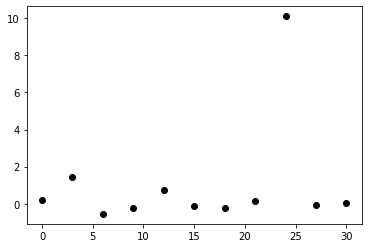

In [12]:
X = np.linspace(t_min, t_max, 11)
y_outlier = generate_data(X, A=2, sigma=0.1, omega=0.1 * 2 * np.pi, noise=0.1, n_outliers=1)

plt.scatter(X, y_outlier,  color='black')
plt.show()

### Lineáris regresszió az eredeti adatokra

In [13]:
# X formába hozása
# "One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions."
# Részletek: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
X = np.reshape(X, (-1, 1))
X

array([[ 0.],
       [ 3.],
       [ 6.],
       [ 9.],
       [12.],
       [15.],
       [18.],
       [21.],
       [24.],
       [27.],
       [30.]])

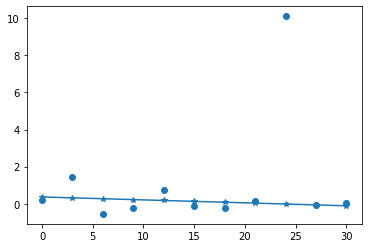

In [42]:
# Hozzunk létre egy példányt a LinearRegression osztályból a linreg változóba!
linreg=linear_model.LinearRegression()
# Tanítsuk be a modellt a fit metódus segítségével!
linreg.fit(X,y)
# Predikáljunk az y_lr változóba!
y_lr=linreg.predict(X)
# Jelenítsük meg egy plotban (X,y)-t és (X,y_lr)-t!
plt.plot(X,y_lr,marker="*")
plt.scatter(X,y_outlier)

plt.show()


### Lineáris regresszió az outlierrel kiegészített adatokra

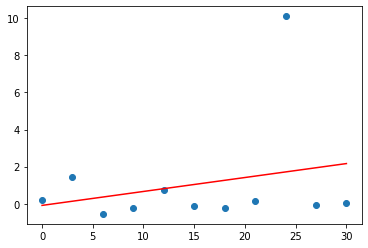

In [45]:
# Ismételjük meg a fentieket, csak az y helyett az y_outlier-t használjuk!
# Modell létrehozása
linreg=linear_model.LinearRegression()
# Lineáris regresszió outlier-t tartalmazó adatra
linreg.fit(X,y_outlier)
# Predikálás
y_linreg=linreg.predict(X)
# Megjelenítés
plt.plot(X,y_linreg,color="red")
plt.scatter(X,y_outlier)

plt.show()


No handles with labels found to put in legend.


[ 0.17640523  1.44913571 -0.54729297 -0.25386198  0.75966123 -0.09772779
 -0.21940833  0.12882044 10.10664535 -0.08677263  0.01440436]


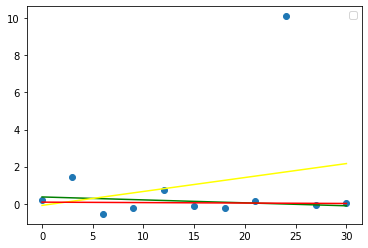

In [47]:
# Illeszzünk robusztus regresszióval és hasonlítsuk össze a három eredményt!
# Hozzunk létre egy példányt a linear_model.HuberRegressor osztályból a huberreg változóba!
huberreg=linear_model.HuberRegressor()
# Tanítsuk be X-en és y_outlier-en!
print(y_outlier)
huberreg.fit(X,y_outlier)
# Predikáljuk X-et a y_outlier_huber változóba!
y_outlier_huber=huberreg.predict(X)
# Készítsünk scatter plotot (X,y_outlier)-en! Segítség: color = 'black'!
plt.scatter(X,y_outlier)
# Készítsünk plot-ot (X, y_linreg)-en! Segítség: color='blue'
plt.plot(X,y_lr, color="green")

# Készítsünk plot-ot (X, y_outlier_linreg)-en! Segítség: color='red'
plt.plot(X,y_linreg, color="yellow")

# Készítsünk plot-ot (X, y_y_outlier_huber)-en! Segítség: color='green'
plt.plot(X,y_outlier_huber, color="red")

# Legend + show
plt.legend()
plt.show()

# Hiba definíció
- Milyen lehetőségek vannak a négyzetes hiba mellett?
- Outlierek nélkül vizsgáljuk a módszereket.

## Ridge regression (L2, Tyihonov regularizáció)
- Ahogy a representation learning órán is láttuk, a hiba több tagból is állhat.
- A ridge regression egy négyzetes hibatagot ad a rekonstrukció hibájához.
- A képlet
$$ \sum_{i=1}^n(y_i-\hat{y}_1)^2 + \alpha \sum\beta^2 $$

- A hibatag segítségével a korrellált változók fognak kiesni.
- Tehát a modell bonyolultabb, mint a sima lineáris regresszió, azaz nagyobb a torzítás, ugyanakkor csökken a variancia a multikollinearitás csökkenése miatt

Részletek: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf

## LASSO (least absolute shrinkage and selection operator, L1-regularizáció)

* Szintén a súlyokat regularizálja, de négyzetes tag helyett a súlyok(coefficiensek) abszolút értékét minimalizálja
emiatt a coefficiens ritka vektor lesz
* Sok attribútum hozzájárulása 0 lesz (ritka reprezentáció alakul ki, y-t kevesebb magyarázó változóval tudjuk leírni)

$$min \sum_{i=1}^n(y_i-\hat{y}_1)^2 + \alpha \sum|\beta|  $$

![LASSO](https://drive.google.com/uc?export=view&id=1rXzxbq8Ryrxem7vLLmFNUcl_xL9sZnoH)


## Elastic-net

Ridge és LASSO kombinálása

Ami megoldására hivatott:
* n<<p esetben LASSO legfeljebb n leírót választ, azaz érzékeny erre a paraméterre.
* Erősebb korrelációk esetén korrelált csoportokból LASSO legfeljebb 1 leírót választ. 

$$min \sum_{i=1}^n(y_i-\hat{y}_1)^2 + \alpha \sum|\beta| + (1-\alpha) \sum \beta^2  $$

Részletek: https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf

# PCR PCA+REGRESSZIÓ

- Principal component regression
- PCA, majd a transzformált változókon lineáris regresszió
- Egyszerű, gyors, de PCA problémáit hozza: outlierek, nem normális eloszlások
- Érdekes példa spektrumelemzésre: https://www.idtools.com.au/principal-component-regression-python-2/

# Paraméterekben lineáris modellezés: Polinomiális regresszió

* nemlineáris függés a prediktorok és célváltozó között
* paraméterekben modell lineáris, tehát lineáris becslő eljárások jók
* Polinomiális modellillesztéshez is legegyszerűbb legkisebb négyzetes hiba módszert használni. 
* Modell szelekció: hanyadfokú polinomok kellenek?

## Minta előállítása

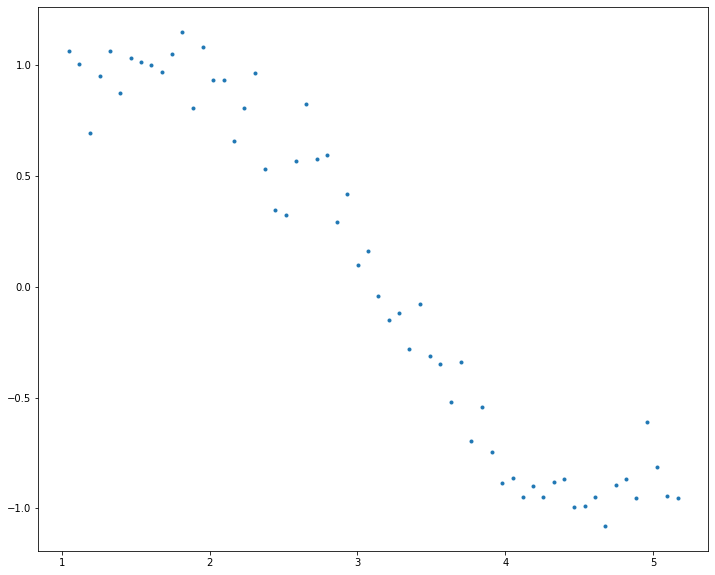

In [ ]:
import pandas as pd

# Kicsit nagyobb ábrát szeretnénk
rcParams['figure.figsize'] = 12, 10

# Input vektor: szögek 60 és 300 fok között radiánba konvertálva
x = np.array([i*np.pi/180 for i in range(60, 300, 4)])
# Random szám generáláshoz "seed" rögzítése reprodukálhatóság érdekében
np.random.seed(10)
# Leképezés definálása (szinusz + zaj)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
# Adatok DataFrame-be helyezése
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
# Minta megjelenítése
plt.plot(data['x'],data['y'],'.')
plt.show()

## Bázis előállítása

In [ ]:
# x-et előállítja 15. hatványig a polinomiális illesztéshez
# Első kitevő adott...
for i in range(2,16):
    # Új prediktorok a bázis prediktor hatványai lesznek
    colname = 'x_{}'.format(i)
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2  ...       x_13       x_14       x_15
0  1.047198  1.065763  1.096623  ...   1.821260   1.907219   1.997235
1  1.117011  1.006086  1.247713  ...   4.214494   4.707635   5.258479
2  1.186824  0.695374  1.408551  ...   9.268760  11.000386  13.055521
3  1.256637  0.949799  1.579137  ...  19.486248  24.487142  30.771450
4  1.326450  1.063496  1.759470  ...  39.353420  52.200353  69.241170

[5 rows x 16 columns]


## Lineáris regresszió

In [ ]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):

    # Prediktorok inicializálása
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    # Modell illesztés
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    # Ha az aktuális hatványt ki szeretnénk rajzolni
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    # Térjünk vissza a hibával és a modell paraméterekkel
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

### Plot

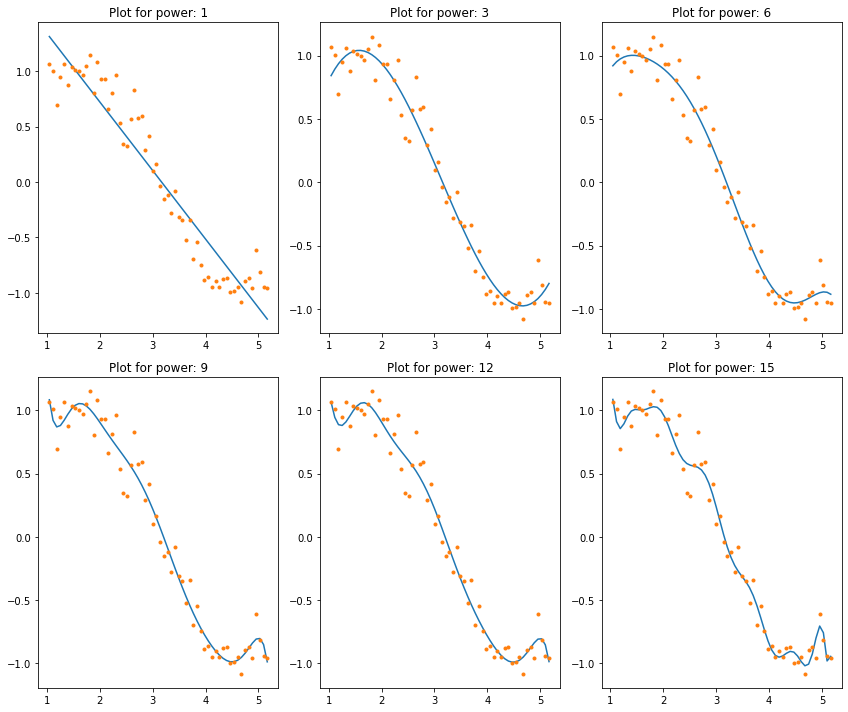

In [ ]:
# Az eredményeket tároló pandas Dataframe inicializálása:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# Dictionary: milyen kitevős illesztés melyik alábrába kerüljön:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

# Végigmegyünk minden kitevőn és megmutatjuk az illesztéseket
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

- Ahogy emelkedik a polinom foka, egyre inkább túltanul a rendszer.
- Szeretnénk, ha általánosítana, azaz nem megjegyezni próbálná a pontokat, hanem megtalálni a rendszert abban, ahogy a pontok elhelyezkednek.

### Együtthatók

In [ ]:
# Trükk, hogy a számokat olvashatóbb formában lássuk. Értékeket természetesen nem változtatja.
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


- A modell komplexitásával (exponenciálisan) nő az együtthatók értéke.
- Magasak az együtthatók értékei. Innen látszik, hogy komplex / bonyolult összefüggéseket modellez, azaz túltanul.


## Ridge regresszió

In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # Model illesztés
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    # Csak adott alfa értékekhez tartozó illesztést plottoljunk
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # Eredményeket listában adjuk vissza
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

### Plot

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  overwrite_a=True).T


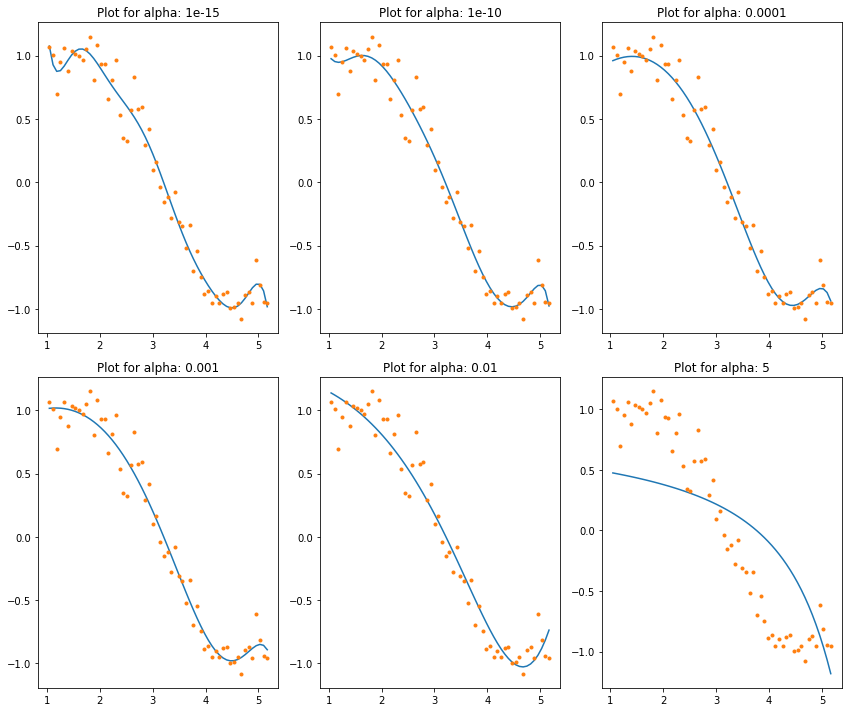

In [ ]:
# Prediktorok inicializálása
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

# Mely alfa értékeket szeretnénk vizsgálni
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# DataFrame inicializálása
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# Plot
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

- Az alfa értékek növekedésével csökken a modell komplexitása.
- Ha nagyon megszorítjuk a modellt (alfa = 5), akkor nem találja a trendet.

### Együtthatók

In [ ]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-3e+02,3.8e+02,-2.4e+02,68,-1.2,-3.7,0.3,0.19,-0.021,-0.0077,0.0011,0.00025,-6.3e-05,4.6e-06,-9e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


- A modell komplexitása csökken.
- Már kis alfa is változtat.
- A magas alfa underfitting-et okoz.

## Lasso regresszió

In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    # Modell fittelése
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    # Megjelenítünk, ha szükséges
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # Eredmények visszatérése
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

### Plot

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259036853, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4782818399057239, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190410706, tolerance: 0.00369480384218441
  positive)


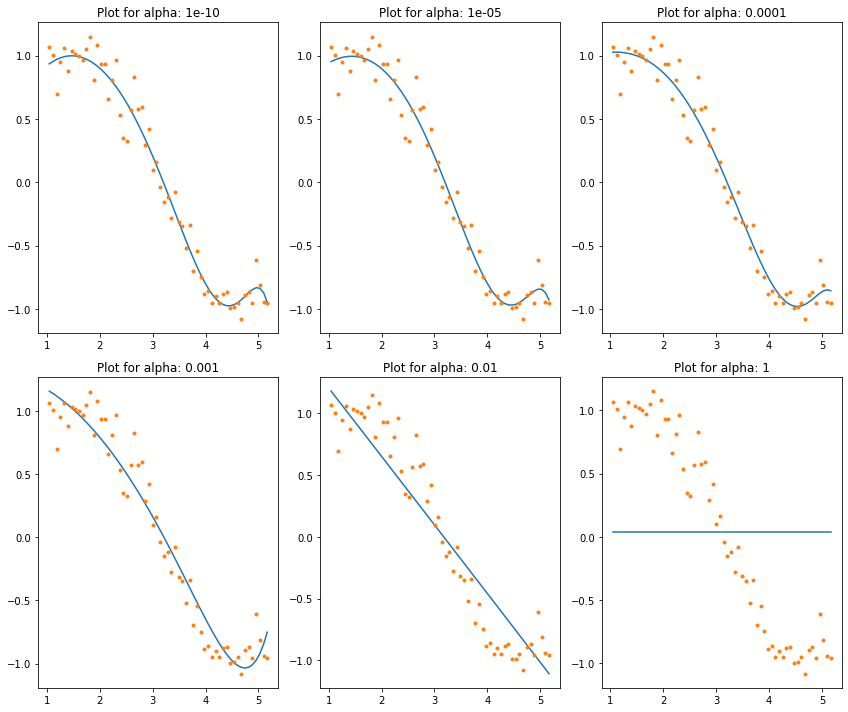

In [ ]:
# Prediktorok inicializálása
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

# Mely alfa értékeket vizsgáljuk
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# DataFrame inicializálása
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

# Mely alfákat szeretnénk megvizsgálni
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

# Regresszió a különböző alfa értékek esetén
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

- Itt is egyszerüsödik a modell.
- Megjelenik az 1 együtthatós eset (alfa=0.01).

### Együtthatók

In [ ]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


- Ritka a reprezentáció
- Kisebbek az együtthatók
- Nagyobb hiba, mint a ridge esetén
- Az alfa más tartományban állítandó, mint a ridge esetén

# A regresszió minőségének vizsgálata

Modell illesztés célja kétféle lehet:
1. prediktorok magyarázó erejének elemzése
2. jövőbeli adatpontokra predikció.

Ez utóbbihoz fontos, hogy illesztett modell általánosító / modellező képességét valahogyan mérni lehessen. Gyakori megoldás kevés adatpont esetén sok train-test adat particionálással illeszteni és tesztelni ugyanazt a modellt. Particionálás módja különbözteti meg a leggyakrabban használt módszereket.

Egy lépésben az alábbiakat tesszük:
- Betanítjuk a modellt az ismert mintán (fit)
- Elvégezzük a predikciót / becslést az ismeretlen mintát (predict)
- Megmérjük, hogy mekkora hibával képes megbecsülni y-t.

# Cross-validation (Out of Sample testing)


- Leave one out cross-validation (Jackknife)
 - Egy mintát kiveszek a datasetből
 - Modell illesztés (N-1) adatponton
 - Illesztés statisztikai elemzése
 - A fentieket az összes minta elemre elvégzem, majd aggregálom a hibát.
 
- K-fold cross-validation
 - Hasonló az előző módszerhez, de nem 1, hanem T<N mintalemmel dolgozunk
 - K particionálást és K db modell illesztést végzünk.
 - Jó esetben $K*T=N$
 - A particiók lehetnek véletlenszerűek (azaz átfedhetnek) vagy exkluzívak
 - Utóbbira példa: 10x CV alkalmazásával adatokat 10 azonos számosságú, nem átfedő részhalmazra bontjuk. Majd 10 lépésben az adatok 9/10-én modell illesztést végzünk, kihagyott partición pedig tesztelünk. 
 
- Stratified K-fold Cross-Validation
 - Megpróbáljuk úgy particionálni az adatokat, hogy a particiók statisztikái hasonlóak legyenek a teljes mintán számoltakkal
 - Regresszió esetén pl átlag és szórás, osztályozás esetén pedig osztály elemek aránya
 
![CV](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

# Házi feladat

Regresszió az Ames House Prices dataset-en.
 - Vizualizáció, EDA
 - Adat tisztítás
  - Hiányzó adatok
  - Felesleges prediktorok
  - Hibás adatok
 - Változók transzformációja (normalizálás, numerikus formára hozás, stb)
 - Modell(ek) tanítása
 - Modellek kiértékelése, összehasonlítás
 - Beszámoló

# Hasznos linkek
- https://gerardnico.com/wiki/data_mining/lasso
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
- http://scipy-cookbook.readthedocs.io/items/robust_regression.html
- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html